In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import time

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-sentiments-analysis-dataset/sentimentdataset.csv


a

In [2]:
df = pd.read_csv("social-media-sentiments-analysis-dataset/sentimentdataset.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [5]:
df.tail()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
727,728,732,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,729,733,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,730,734,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,731,735,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20
731,732,736,Organizing a virtual talent show during challe...,Happy,2020-11-15 15:15:00,VirtualTalentShowSuccessHighSchool,Instagram,#VirtualEntertainment #HighSchoolPositivity,24.0,47.0,USA,2020,11,15,15


In [6]:
df.shape

(732, 15)

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month
df['Year'] = df['Timestamp'].dt.year

In [10]:
df['Text'] = df['Text'].str.strip()
df['Sentiment'] = df['Sentiment'].str.strip()
df['User'] = df['User'].str.strip()
df['Platform'] = df['Platform'].str.strip()
df['Hashtags'] = df['Hashtags'].str.strip()
df['Country'] = df['Country'].str.strip()

In [11]:
df["Retweets"] = df["Retweets"].astype(int)
df["Likes"] = df["Likes"].astype(int)

In [12]:
df.drop(columns = ["Unnamed: 0.1","Unnamed: 0"],axis = 1, inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       732 non-null    object        
 1   Sentiment  732 non-null    object        
 2   Timestamp  732 non-null    datetime64[ns]
 3   User       732 non-null    object        
 4   Platform   732 non-null    object        
 5   Hashtags   732 non-null    object        
 6   Retweets   732 non-null    int64         
 7   Likes      732 non-null    int64         
 8   Country    732 non-null    object        
 9   Year       732 non-null    int32         
 10  Month      732 non-null    int32         
 11  Day        732 non-null    int32         
 12  Hour       732 non-null    int64         
dtypes: datetime64[ns](1), int32(3), int64(3), object(6)
memory usage: 65.9+ KB


In [14]:
df.isnull().sum().sum()

0

In [15]:
df.duplicated().value_counts()

False    710
True      22
Name: count, dtype: int64

In [16]:
df.describe()

,Timestamp,Retweets,Likes,Year,Month,Day,Hour
count,732,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,2020-12-08 21:37:38.196721408,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
min,2010-05-15 15:30:00,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,2019-03-08 17:27:30,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,2021-09-20 14:30:00,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,2023-02-26 11:48:45,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,2023-10-22 20:45:00,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000
std,NaN,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414


In [17]:
k = df.describe(include="object")
k

,Text,Sentiment,User,Platform,Hashtags,Country
count,732,732,732,732,732,732
unique,706,191,670,3,692,33
top,"A compassionate rain, tears of empathy falling...",Positive,ForestDreamer,Instagram,#Playful #CarnivalEscapade,USA
freq,3,45,3,258,3,188


In [18]:
# for i in k.columns:
#     print(i)
#     print(df[i].unique())
#     print("*"*50)

In [19]:
df

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park!,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15,30,USA,2023,1,15,12
1,Traffic was terrible this morning.,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5,10,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20,40,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway!,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8,15,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight.,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12,25,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20,39,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25,48,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22,42,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21,43,UK,2020,2,29,20


# **Analysis**

In [20]:
df.columns

Index(['Text', 'Sentiment', 'Timestamp', 'User', 'Platform', 'Hashtags',
       'Retweets', 'Likes', 'Country', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [21]:
sten = df["Sentiment"].value_counts().head(10).reset_index()
sen = pd.DataFrame(sten)
sen

,Sentiment,count
0,Positive,45
1,Joy,44
2,Excitement,37
3,Contentment,19
4,Neutral,18
5,Gratitude,18
6,Curiosity,16
7,Serenity,15
8,Happy,14
9,Nostalgia,11


# **Platform wise Distribution**

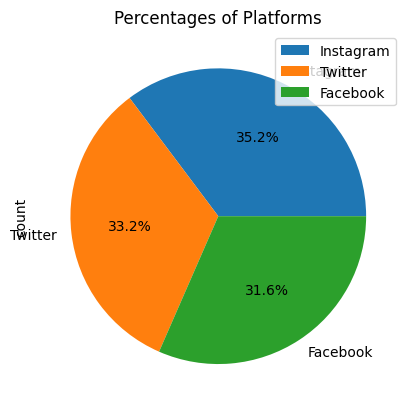

In [22]:
df['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

**Whole Sentiments**

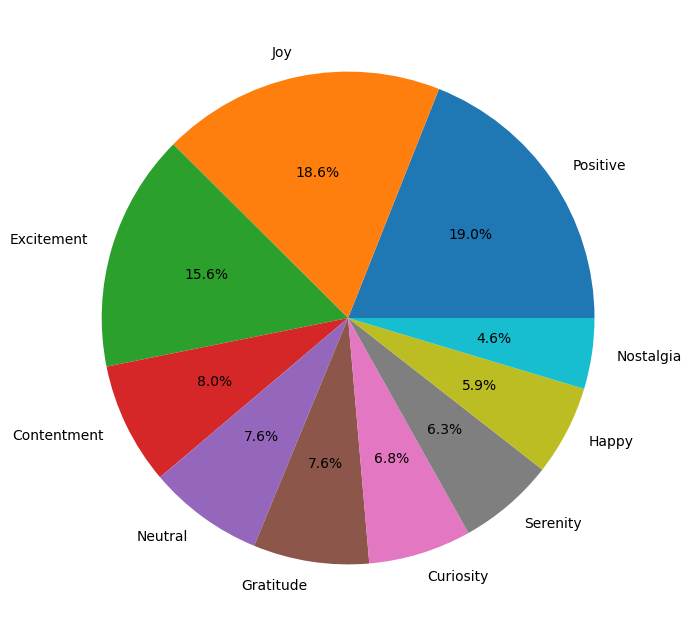

In [23]:
plt.figure(figsize=(10,8))
s = plt.pie(sen["count"], labels = sen["Sentiment"],autopct='%1.1f%%')
plt.show()

**Whole Hashtags**

In [24]:
k = df["Hashtags"].value_counts().head(10).reset_index()
Hash = pd.DataFrame(k)
Hash

,Hashtags,count
0,#Playful #CarnivalEscapade,3
1,#Hopeful #SeedsOfOptimism,3
2,#Proud #ScalingPeaks,3
3,#Compassionate #TearsOfEmpathy,3
4,#Numbness #EmotionalShield,2
5,#Acceptance #LifeJourney,2
6,#Curiosity #AncientMysteries,2
7,#Frustrated #MosaicOfDisappointment,2
8,#Confusion #ThoughtLabyrinth,2
9,#Inspired #TalesToTheStars,2


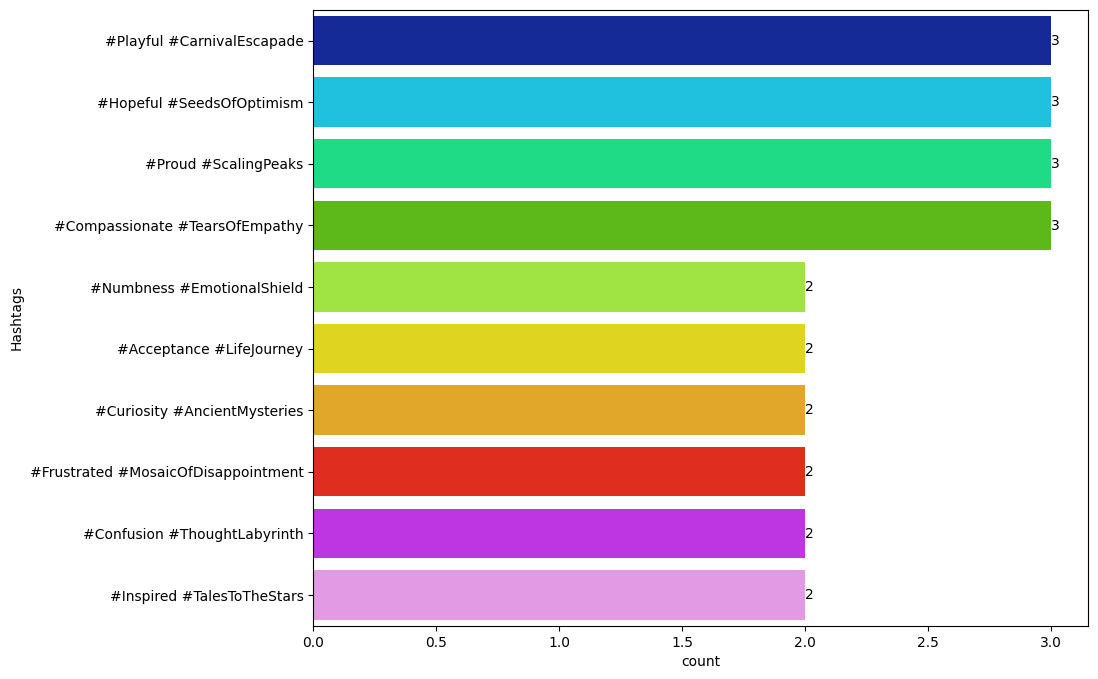

In [25]:
plt.figure(figsize = (10,8))
k = sns.barplot(y = "Hashtags", x = "count", data = Hash, palette = "gist_ncar")
for bars in k.containers:
    k.bar_label(bars)
plt.show()

**top 10 hashtag retweeted**

In [26]:
k = df.groupby("Hashtags")["Retweets"].max().nlargest(10).sort_values(ascending = False).reset_index()
b = pd.DataFrame(k)
b

,Hashtags,Retweets
0,#Anticipation #AdventureAwaits,40
1,#Despair #AbyssOfHeartache,40
2,#Disappointment #SoccerDefeats,40
3,#Elation #RareBookDiscovery,40
4,#Emotion #AdeleConcert,40
5,#Enthusiasm #JustinBieber,40
6,#Excitement #MoviePremiereThrills,40
7,#Joy #EndlessSmiles,40
8,#Joy #SimpleMoments,40
9,#Joy #WorldCupTriumph,40


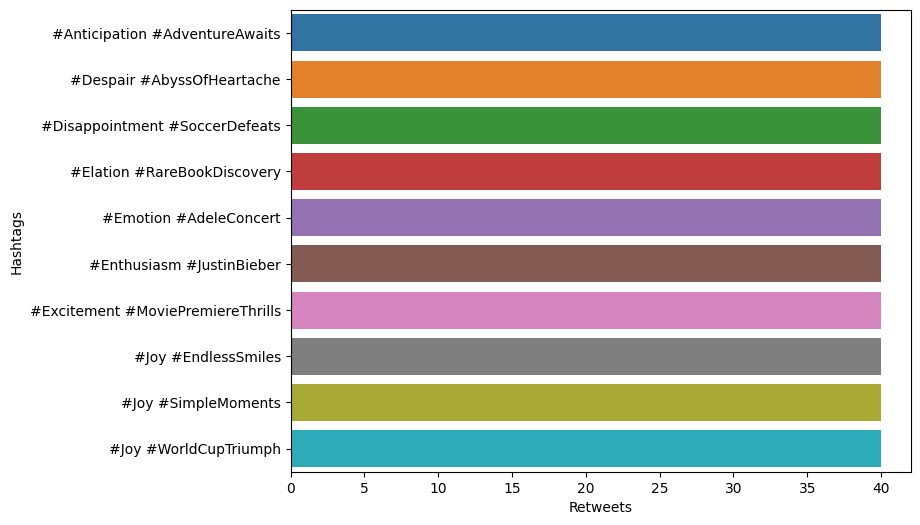

In [27]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Retweets", y = "Hashtags", data = b)
plt.show()

Top 10 liked Hashtags

In [28]:
k = df.groupby("Hashtags")["Likes"].max().nlargest(10).reset_index()
b = pd.DataFrame(k)
b

,Hashtags,Likes
0,#Anticipation #AdventureAwaits,80
1,#Despair #AbyssOfHeartache,80
2,#Disappointment #SoccerDefeats,80
3,#Elation #RareBookDiscovery,80
4,#Emotion #AdeleConcert,80
5,#Enthusiasm #JustinBieber,80
6,#Excitement #MoviePremiereThrills,80
7,#Joy #EndlessSmiles,80
8,#Joy #SimpleMoments,80
9,#Joy #WorldCupTriumph,80


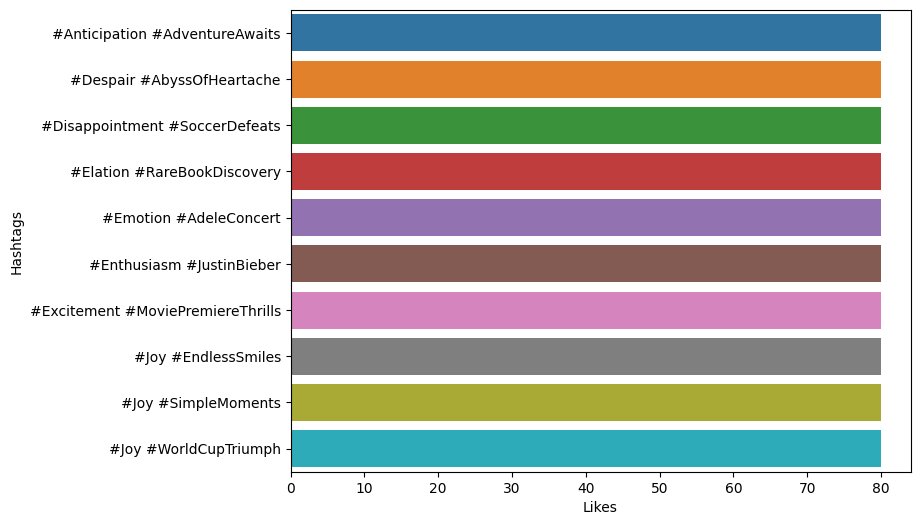

In [29]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Likes", y = "Hashtags", data = b)
plt.show()

**Whole likes year wise**

In [30]:
k = df.groupby('Year')['Likes'].sum().reset_index()
ly = pd.DataFrame(k)
ly

,Year,Likes
0,2010,160
1,2011,185
2,2012,160
3,2013,175
4,2014,160
5,2015,859
6,2016,1661
7,2017,1785
8,2018,2505
9,2019,3224


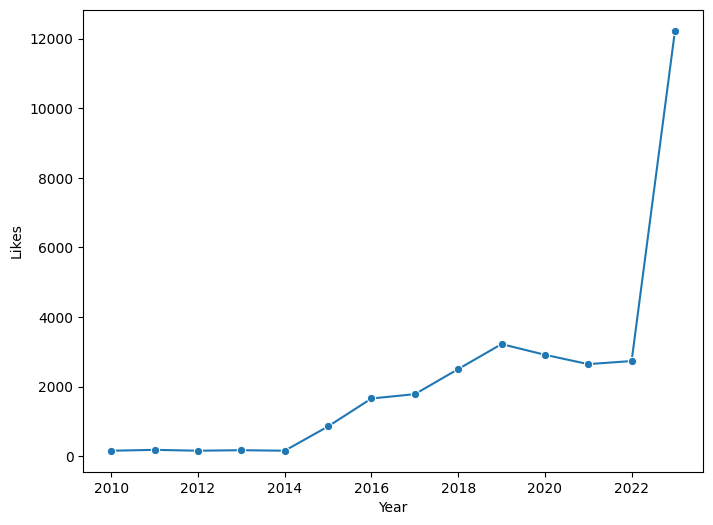

In [31]:
plt.figure(figsize = (8,6))
sns.lineplot(x = "Year", y = "Likes", data = ly, marker = "o")
plt.show()

**likes wise top 10 Sentiments**

In [32]:
k = df.groupby("Sentiment")["Likes"].sum().nlargest(10).reset_index()
k = pd.DataFrame(k)
k

,Sentiment,Likes
0,Joy,2168
1,Excitement,1860
2,Positive,1700
3,Contentment,976
4,Gratitude,885
5,Neutral,729
6,Curiosity,688
7,Serenity,636
8,Happy,632
9,Awe,400


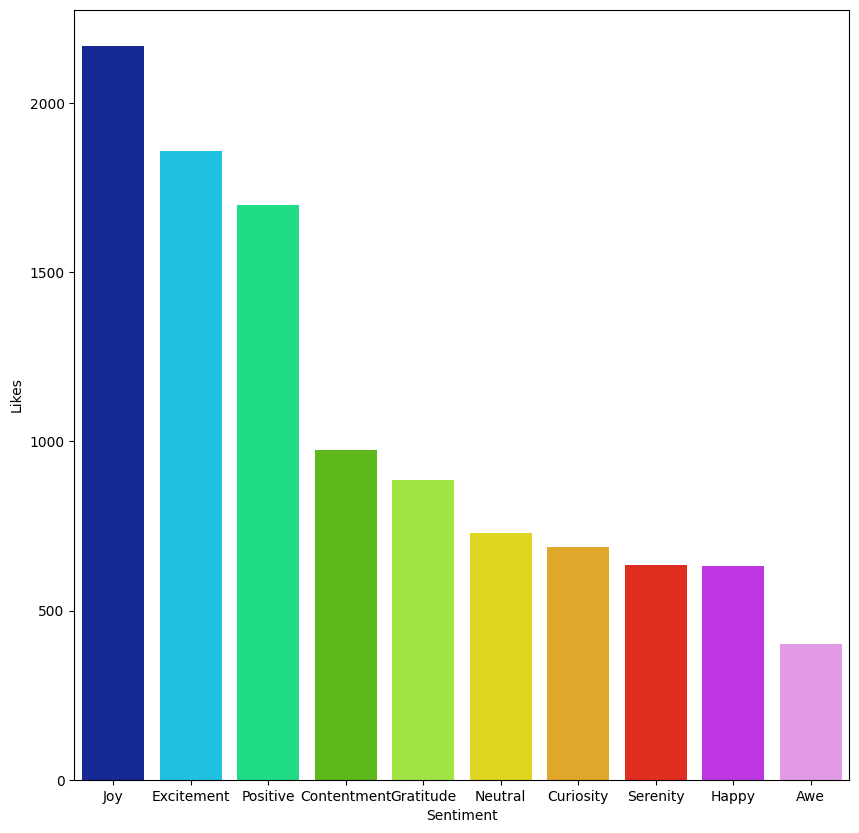

In [33]:
plt.figure(figsize=(10,10))
sns.barplot(x = "Sentiment",y = "Likes",data= k ,palette="gist_ncar",)
plt.show()

**Likes by the Hours**

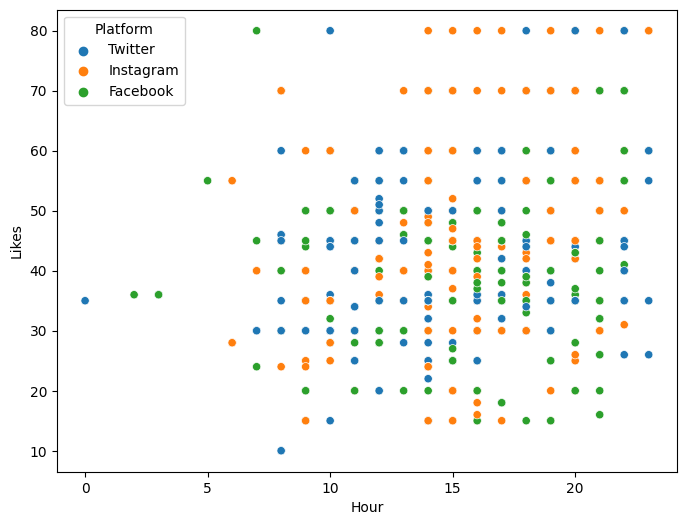

In [34]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = 'Hour', y = 'Likes',hue = "Platform")
plt.show()

**Country wise Distribution of user**

In [35]:
k = df["Country"].value_counts().nlargest(10).reset_index()
b = pd.DataFrame(k)
b

,Country,count
0,USA,188
1,UK,143
2,Canada,135
3,Australia,75
4,India,70
5,Brazil,17
6,France,16
7,Japan,15
8,Germany,14
9,Italy,11


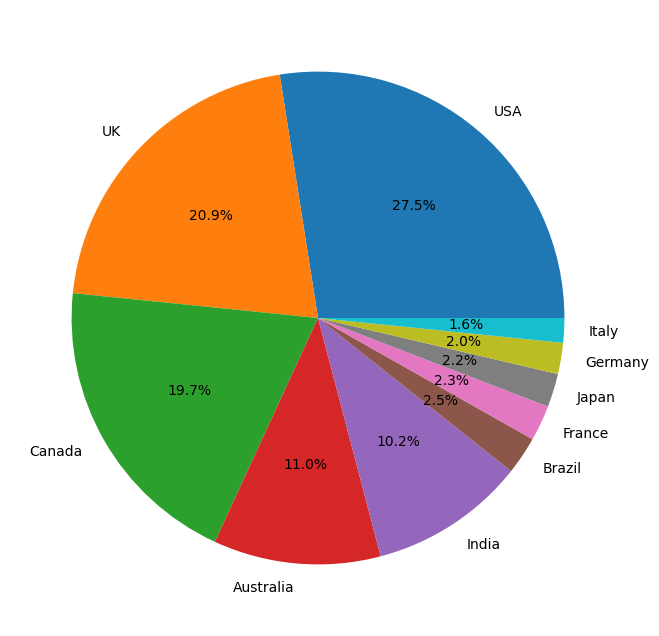

In [36]:
plt.figure(figsize=(12,8))
s = plt.pie(b["count"], labels = b["Country"],autopct='%1.1f%%')
plt.show()

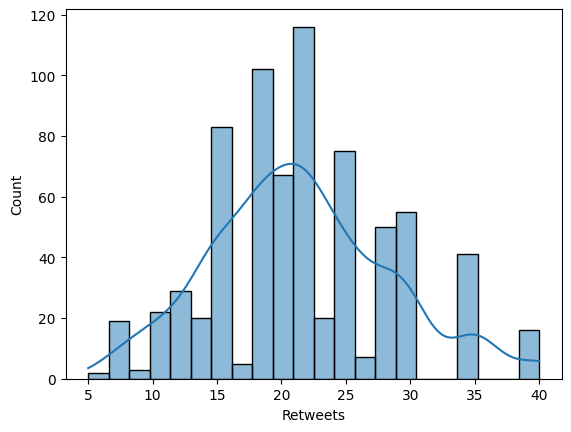

In [37]:
sns.histplot(df.Retweets,kde = True)
plt.show()

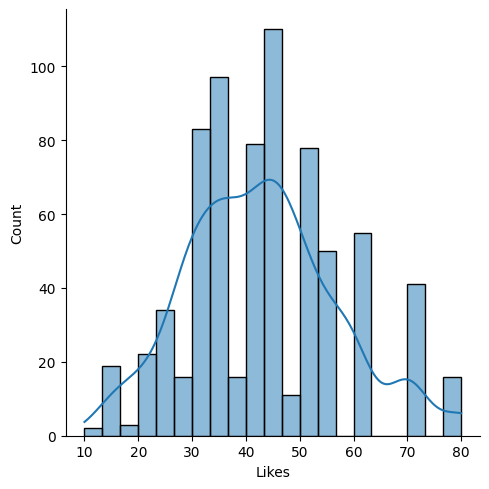

In [38]:
sns.displot(df.Likes,kde = True)
plt.show()

**Top 10 retweeted text**

In [39]:
k = df.groupby("Text")["Retweets"].sum().nlargest(10)
tophash = pd.DataFrame(k)
tophash

,Retweets
Text,
"A playful escapade in the carnival of life, carousel laughter and cotton candy dreams swirling in the joyous atmosphere.",72
"Proudly scaling the peaks of achievement, a mountaineer conquering challenges and planting the flag of success.",69
"A compassionate rain, tears of empathy falling gently, nurturing the seeds of kindness in the garden of human connections.",63
Savoring the warmth of a cup of cocoa on a chilly winter evening.,60
Whispers of inspiration from the rustling leaves in a serene forest.,56
"Playfully juggling responsibilities, a circus performer balancing the acts of work and joy, tossing laughter into the air.",50
"Confident strides in the dance of life, a ballroom where self-assuredness leads, twirling through challenges with grace.",46
"A free spirit soaring on the wings of dreams, leaving trails of independence in the azure sky of boundless possibilities.",44
Heartfelt gratitude for the laughter shared during a family reunion.,44


**Top 10 liked text**

In [40]:
k = df.groupby("Text")["Likes"].sum().nlargest(10)
toplike = pd.DataFrame(k)
toplike

,Likes
Text,
"A playful escapade in the carnival of life, carousel laughter and cotton candy dreams swirling in the joyous atmosphere.",144
"Proudly scaling the peaks of achievement, a mountaineer conquering challenges and planting the flag of success.",138
"A compassionate rain, tears of empathy falling gently, nurturing the seeds of kindness in the garden of human connections.",126
Savoring the warmth of a cup of cocoa on a chilly winter evening.,120
Whispers of inspiration from the rustling leaves in a serene forest.,110
"Playfully juggling responsibilities, a circus performer balancing the acts of work and joy, tossing laughter into the air.",100
"Confident strides in the dance of life, a ballroom where self-assuredness leads, twirling through challenges with grace.",92
Heartfelt gratitude for the laughter shared during a family reunion.,90
"A free spirit soaring on the wings of dreams, leaving trails of independence in the azure sky of boundless possibilities.",88


# **Twitter**

**Sentiment**

In [41]:
k = df[df["Platform"] == "Twitter"]
sentw = k["Sentiment"].value_counts().head(10).reset_index()
sentwitter = pd.DataFrame(sentw)
sentwitter

,Sentiment,count
0,Positive,13
1,Excitement,13
2,Joy,10
3,Gratitude,7
4,Neutral,6
5,Contentment,6
6,Serenity,6
7,Hopeful,4
8,Proud,4
9,Curiosity,4


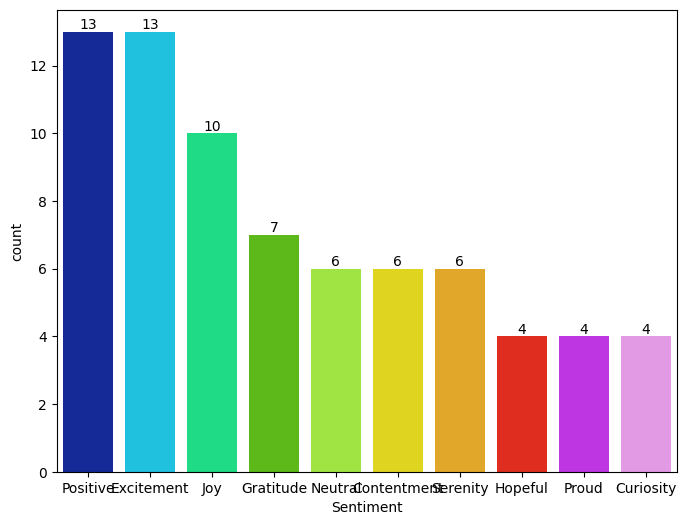

In [42]:
plt.figure(figsize = (8,6))
a = sns.barplot(x = "Sentiment", y = "count", data = sentwitter, palette = "gist_ncar")
for bars in a.containers:
    a.bar_label(bars)

**Top 10 Hashtags Twitter wise**

In [43]:
k = df[df["Platform"] == "Twitter"]
b = k["Hashtags"].value_counts().head(10).reset_index()
hashtw = pd.DataFrame(b)
hashtw

,Hashtags,count
0,#Proud #ScalingPeaks,3
1,#Rejuvenation #SeasideEscape,2
2,#Hopeful #SailorOfDreams,2
3,#FreeSpirit #WingsOfDreams,2
4,#Inspired #CloudsOfCreativity,2
5,#Love #SpreadLove,2
6,#Hopeful #BrighterTomorrows,2
7,#Satisfaction #FulfillingEnding,1
8,#Inspiration #HiddenGemDiscovery,1
9,#Obstacle #CyclingFrustration,1


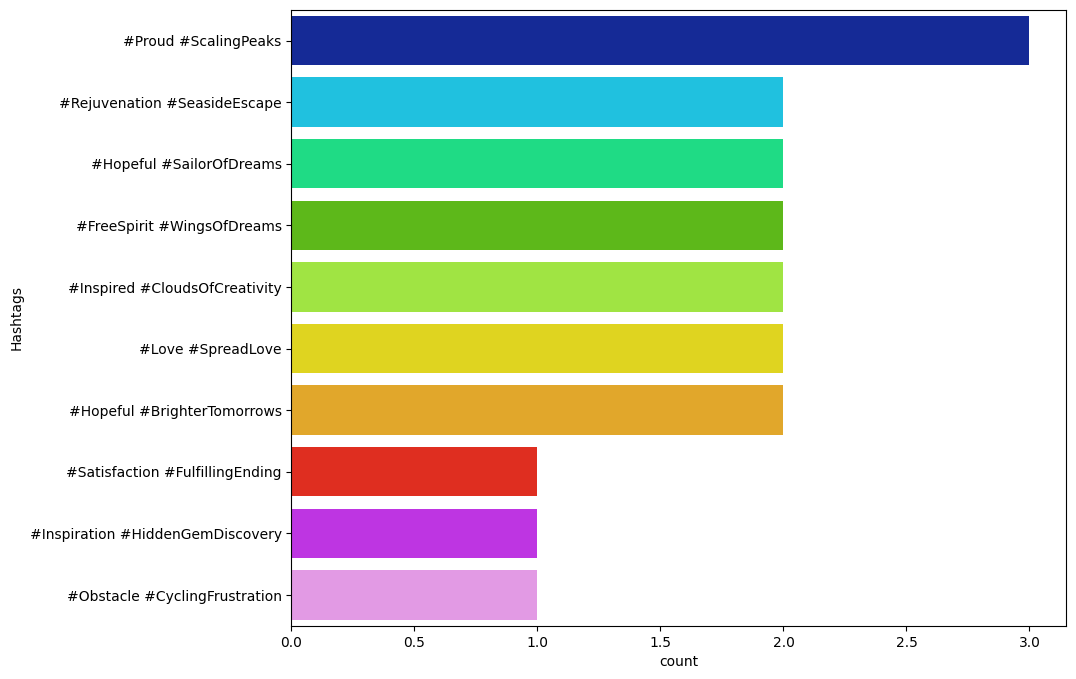

In [44]:
plt.figure(figsize = (10,8))
sns.barplot(y= "Hashtags", x ="count", data = hashtw, palette = "gist_ncar")
plt.show()

**top 10 hashtag retwitted in Twitter**

In [45]:
k = df[df["Platform"] == "Twitter"]
b = k.groupby("Hashtags")["Retweets"].max().nlargest(10).sort_values(ascending = False).reset_index()
hashret = pd.DataFrame(b)
hashret

,Hashtags,Retweets
0,#Anticipation #AdventureAwaits,40
1,#Disappointment #SoccerDefeats,40
2,#Excitement #MoviePremiereThrills,40
3,#Mesmerizing #NightDancePerformance,40
4,#Adventure #CulinaryJourney,35
5,#Adventure #RoadTripMemories,35
6,#Creativity #LadyGaga,35
7,#CulinaryOdyssey #FlavorsAroundTheWorld,35
8,#Energy #BeyonceConcert,35
9,#Gratitude #LifeLessons,35


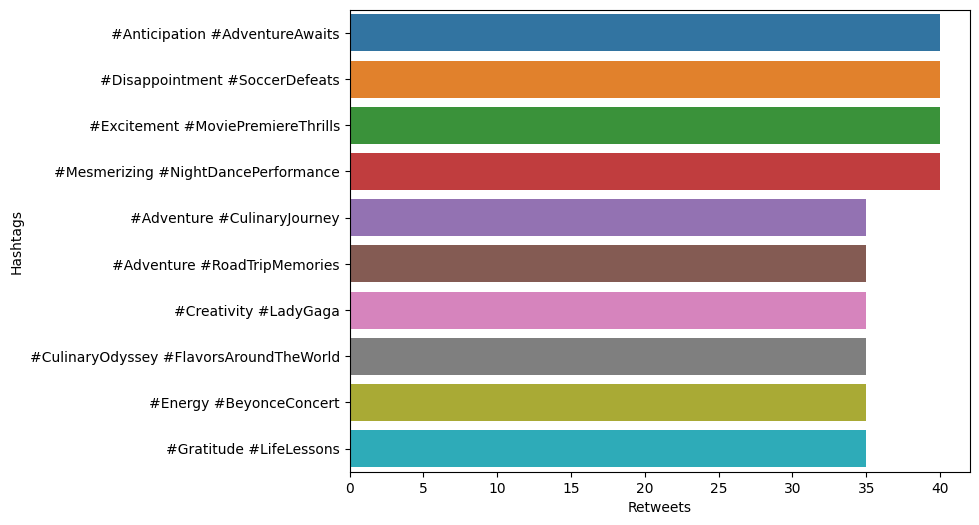

In [46]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Retweets", y = "Hashtags", data = hashret)
plt.show()

**top 10 User Liked in Twitter**

In [47]:
k = df[df["Platform"] == "Twitter"]
b = k.groupby("User")["Likes"].max().nlargest(10).sort_values(ascending = False).reset_index()
hlt = pd.DataFrame(b)
hlt

,User,Likes
0,DanceEnthusiastCityNightPerformance,80
1,MovieEnthusiastPremiereAttendee,80
2,SoccerFanTeamDefeats,80
3,Wanderlust,80
4,BeyonceDancer,70
5,CulinaryExplorer,70
6,DreamTightrope,70
7,EchoedLaughter,70
8,GagaArtisticChameleon,70
9,HistoryExplorerAncientCityTour,70


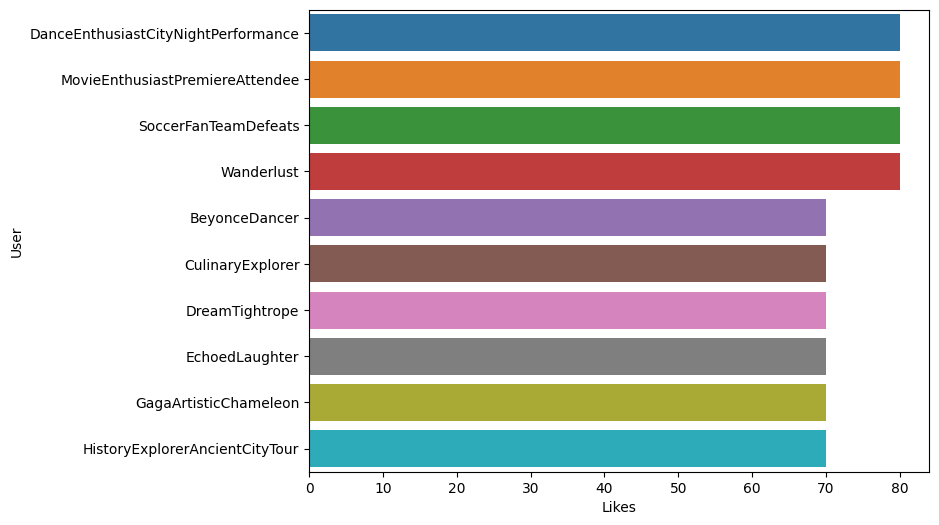

In [48]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Likes", y = "User", data = hlt)
plt.show()

**likes years wise in Twitter**

In [49]:
k = df[df["Platform"] == "Twitter"]
b = k.groupby("Year")["Likes"].sum().reset_index()
lyt = pd.DataFrame(b)
lyt

,Year,Likes
0,2010,160
1,2012,40
2,2013,70
3,2014,60
4,2015,165
5,2016,396
6,2017,785
7,2018,885
8,2019,1367
9,2020,729


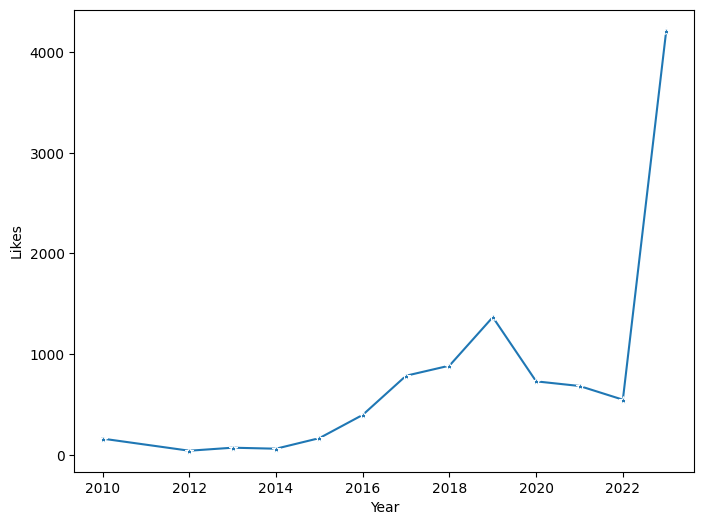

In [50]:
plt.figure(figsize = (8,6))
sns.lineplot(x = "Year", y = "Likes", data = lyt,marker='*')
plt.show()

# **Instagram**

**Sentiment**

In [51]:
k = df[df["Platform"] == "Instagram"]
seni = k["Sentiment"].value_counts().head(10).reset_index()
seninsta = pd.DataFrame(seni)
seninsta

,Sentiment,count
0,Positive,16
1,Joy,14
2,Excitement,13
3,Contentment,7
4,Neutral,6
5,Curiosity,6
6,Happy,6
7,Surprise,4
8,Gratitude,4
9,Hopeful,4


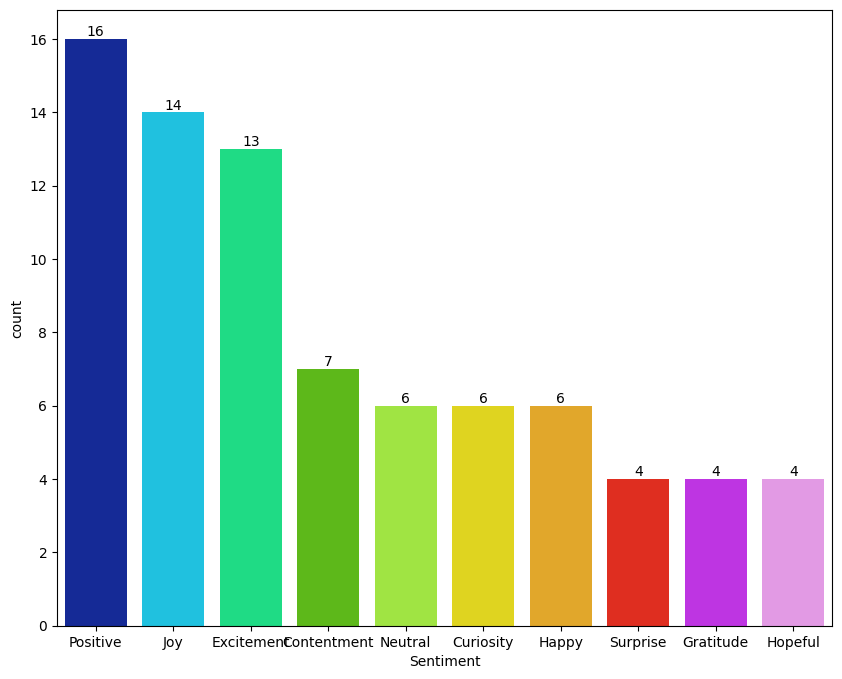

In [52]:
plt.figure(figsize = (10,8))
k = sns.barplot(x = "Sentiment", y = "count", data = seninsta, palette = "gist_ncar")
for bars in k.containers:
    k.bar_label(bars)
plt.show()

In [53]:
k = df[df["Platform"] == "Instagram"]
b = k["Hashtags"].value_counts().head(10).reset_index()
hashin = pd.DataFrame(b)
hashin

,Hashtags,count
0,#Hopeful #SeedsOfOptimism,3
1,#Wonder #StargazingAdventure,2
2,#Numbness #EmotionalStorms,2
3,#Playful #JugglingResponsibilities,2
4,#Grateful #GoldenHues,2
5,#Contentment #TranquilWaters,2
6,#Dismissive #IndifferencePerformance,2
7,#Compassionate #TearsOfEmpathy,2
8,#Coziness #WarmWinterEvening,2
9,#Harmony #MusicalUnity,2


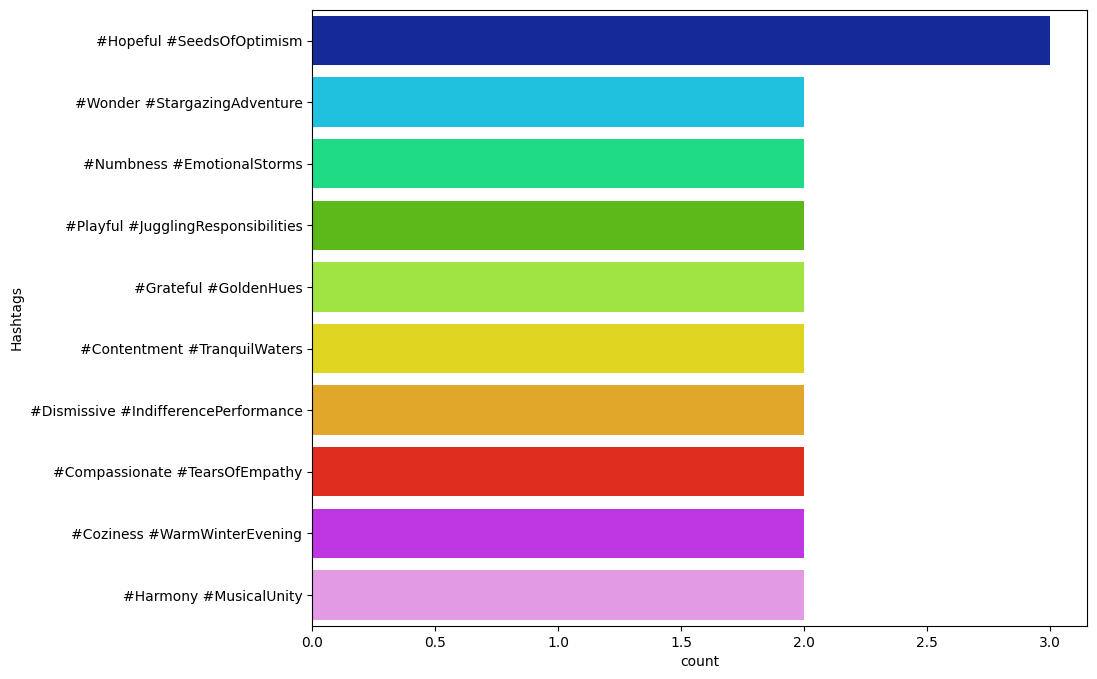

In [54]:
plt.figure(figsize = (10,8))
sns.barplot(y = "Hashtags", x = "count", data = hashin, palette = "gist_ncar")
plt.show()

In [55]:
k = df[df["Platform"] == "Instagram"]
b = k.groupby("Hashtags")["Retweets"].max().nlargest(10).sort_values(ascending = False).reset_index()
hashin = pd.DataFrame(b)
hashin

,Hashtags,Retweets
0,#Despair #AbyssOfHeartache,40
1,#Elation #RareBookDiscovery,40
2,#Emotion #AdeleConcert,40
3,#Enthusiasm #JustinBieber,40
4,#Joy #EndlessSmiles,40
5,#Joy #SimpleMoments,40
6,#Joy #WorldCupTriumph,40
7,#Thrill #CulturalCelebration,40
8,#Tranquility #SunsetBeauty,40
9,#Wonder #StargazingAdventure,40


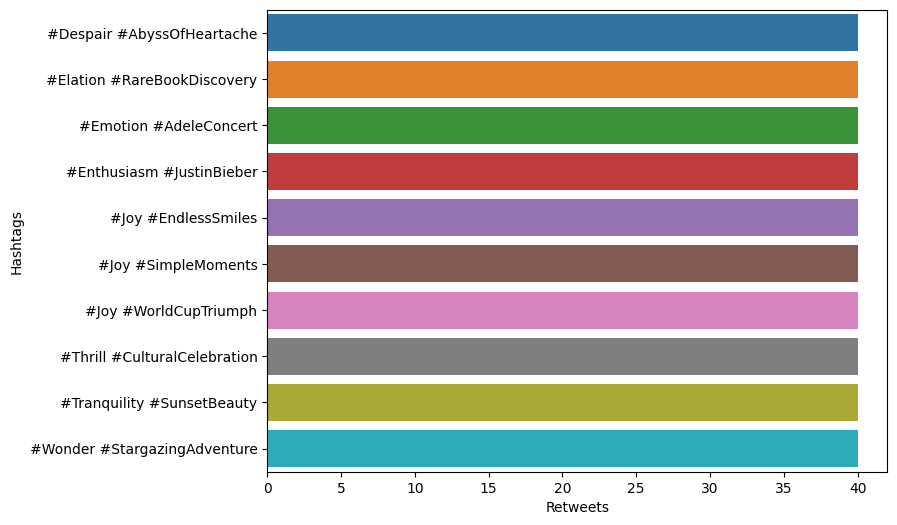

In [56]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Retweets", y = "Hashtags", data = hashin)
plt.show()

**top 10 User Liked in Instagram**

In [57]:
k = df[df["Platform"] == "Instagram"]
b = k.groupby("User")["Likes"].max(10).nlargest(10).sort_values(ascending = False).reset_index()
hli = pd.DataFrame(b)
hli

,User,Likes
0,AdeleConcertGoer,80
1,BieberDanceEnthusiast,80
2,Bookworm,80
3,ColorfulLaughter,80
4,CosmosExplorer,80
5,CultureEnthusiast,80
6,FootballFanWorldCupCelebration,80
7,NatureEnthusiastSunsetWonder,80
8,SolitaryDescent,80
9,SunshineDancer,80


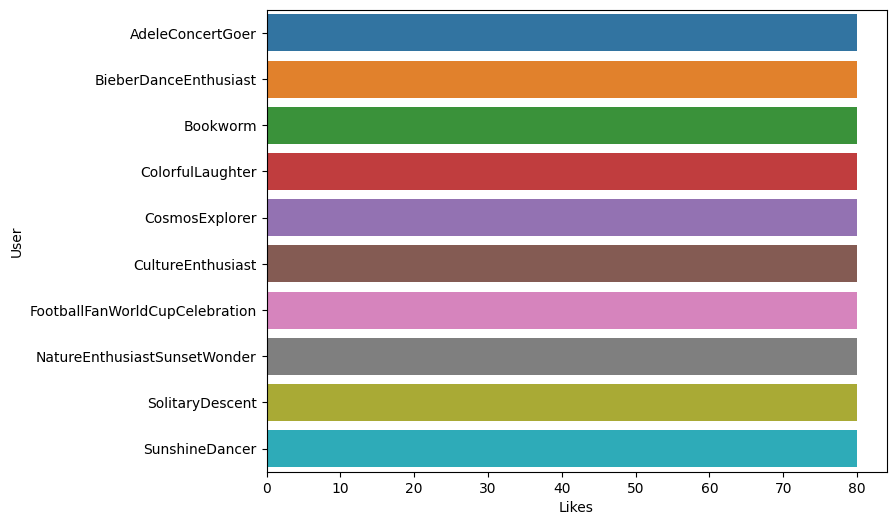

In [58]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Likes", y = "User",data = hli)
plt.show()

**likes years wise in Instagram**

In [59]:
k = df[df["Platform"] == "Instagram"]
b = k.groupby("Year")["Likes"].sum().reset_index()
lyi = pd.DataFrame(b)
lyi

,Year,Likes
0,2011,90
1,2012,60
2,2013,60
3,2014,100
4,2015,269
5,2016,525
6,2017,521
7,2018,971
8,2019,1265
9,2020,1189


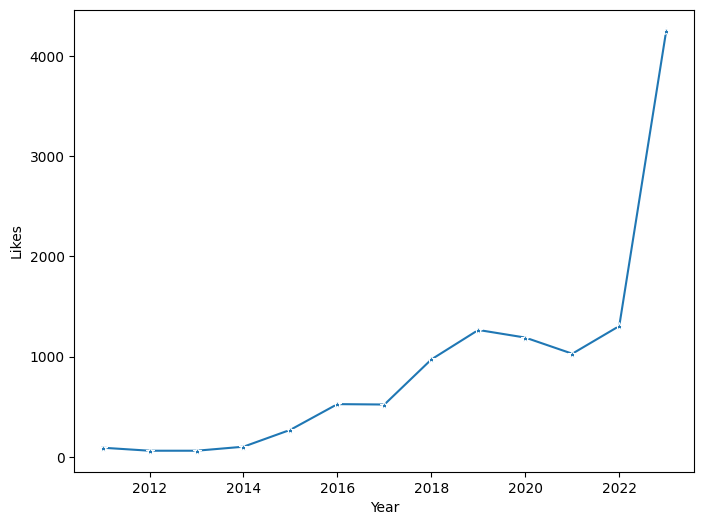

In [60]:
plt.figure(figsize = (8,6))
sns.lineplot(x = "Year", y = "Likes", data = lyi,marker='*')
plt.show()

# **Facebook**

**Sentiment**

In [61]:
k = df[df["Platform"] == "Facebook"]
seni = k["Sentiment"].value_counts().head(10).reset_index()
senface = pd.DataFrame(seni)
senface

,Sentiment,count
0,Joy,20
1,Positive,16
2,Excitement,11
3,Gratitude,7
4,Neutral,6
5,Curiosity,6
6,Grief,6
7,Contentment,6
8,Awe,5
9,Serenity,5


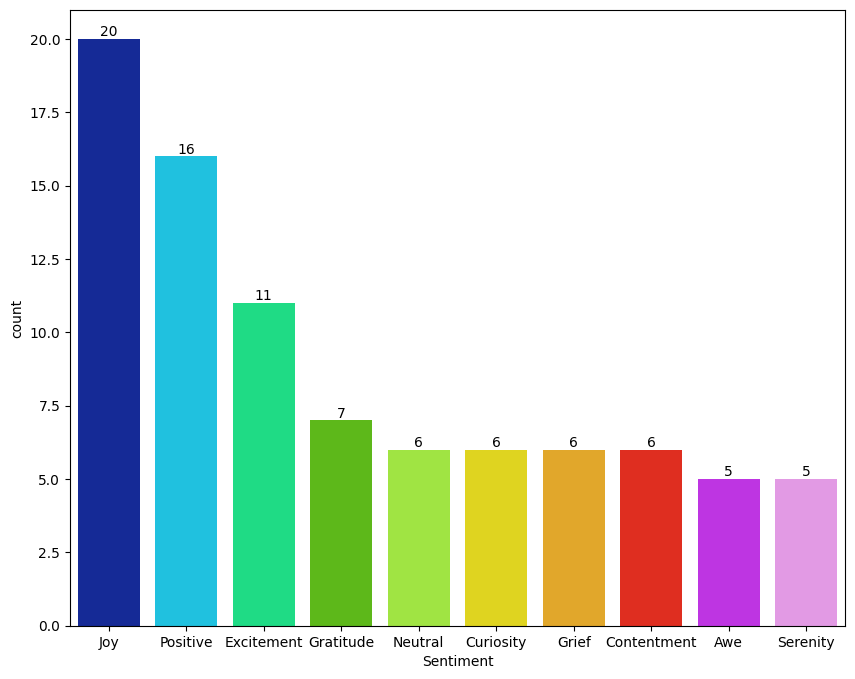

In [62]:
plt.figure(figsize = (10,8))
k = sns.barplot(x = "Sentiment", y = "count", data = senface, palette = "gist_ncar")
for bars in k.containers:
    k.bar_label(bars)
plt.show()

**Hashtags**

In [63]:
k = df[df["Platform"]=="Facebook"]
b = k["Hashtags"].value_counts().head(10).reset_index()
hashfa = pd.DataFrame(b)
hashfa

,Hashtags,count
0,#Playful #CarnivalEscapade,3
1,#Shame #Injustice,2
2,#Radiance #SpringBlooms,2
3,#Inspiration #ForestWhispers,2
4,#Gratitude #FamilyLaughter,2
5,#Awe #ArchitecturalGrandeur,2
6,#Loneliness #SolitaryNocturne,2
7,#Empathetic #LanternOfCompassion,2
8,#Confident #DanceOfLife,2
9,#Inspired #TalesToTheStars,2


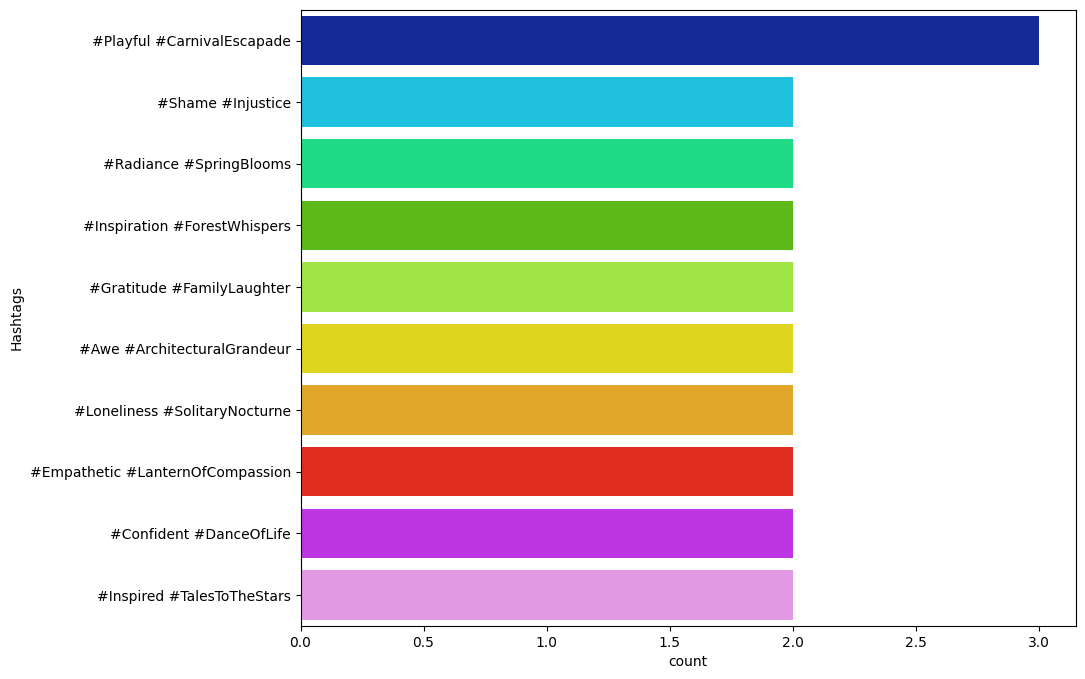

In [64]:
plt.figure(figsize = (10,8))
sns.barplot(y = "Hashtags", x = "count", data = hashfa, palette = "gist_ncar")
plt.show()

**Top 5 Hashtags retwitted**

In [65]:
k = df[df["Platform"] == "Facebook"]
b = k.groupby("Hashtags")["Retweets"].max().nlargest(10).sort_values(ascending = False).reset_index()
hashfa = pd.DataFrame(b)
hashfa

,Hashtags,Retweets
0,#Motivation #FitnessGoals,40
1,#BingeWatchDay #TeenLife,35
2,#Challenge #WeightliftingFailure,35
3,#Determination #CyclingChampion,35
4,#Ecstasy #MetallicaConcert,35
5,#Euphoria #ArianaGrande,35
6,#Imagination #LiteraryEscape,35
7,#LifetimeExperiences #SeniorMemoir,35
8,#Resilience #StandingTall,35
9,#Suspense #CrimeSeriesThrills,35


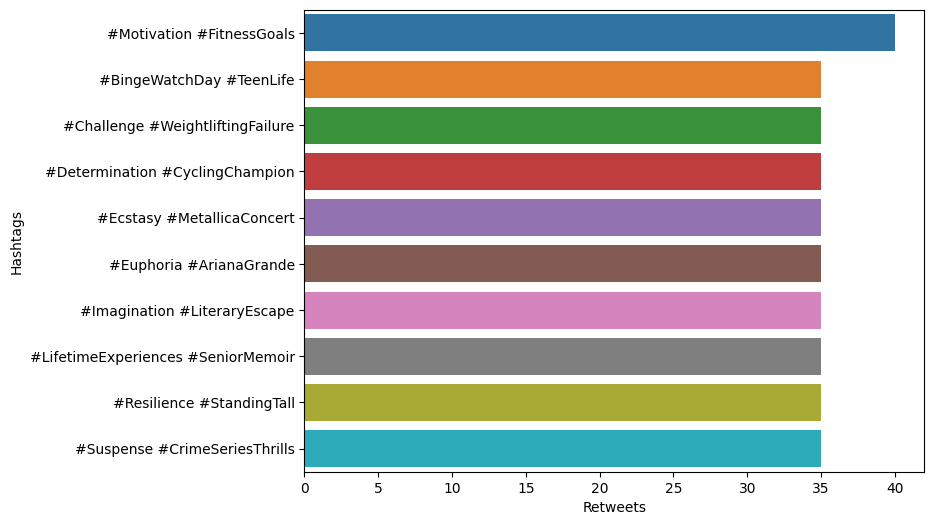

In [66]:
plt.figure(figsize=(8,6))
sns.barplot(x = "Retweets", y = "Hashtags", data = hashfa)
plt.show()

**top 10 hashtag Liked in Facebook**

In [67]:
k = df[df["Platform"] == "Facebook"]
b = k.groupby("User")["Likes"].max(10).nlargest(10).sort_values(ascending = False).reset_index()
hlf = pd.DataFrame(b)
hlf

,User,Likes
0,FitnessJunkie,80
1,ArianaEuphoriaChaser,70
2,BookwormCaptivatingNovelEscape,70
3,CrimeSeriesEnthusiastThrillSeeker,70
4,CyclingEnthusiastWorldChampion,70
5,LazyWatcher,70
6,MemoiristSenior,70
7,MetallicaMoshWarrior,70
8,NatureResilient,70
9,WeightliftingFanFailedRecord,70


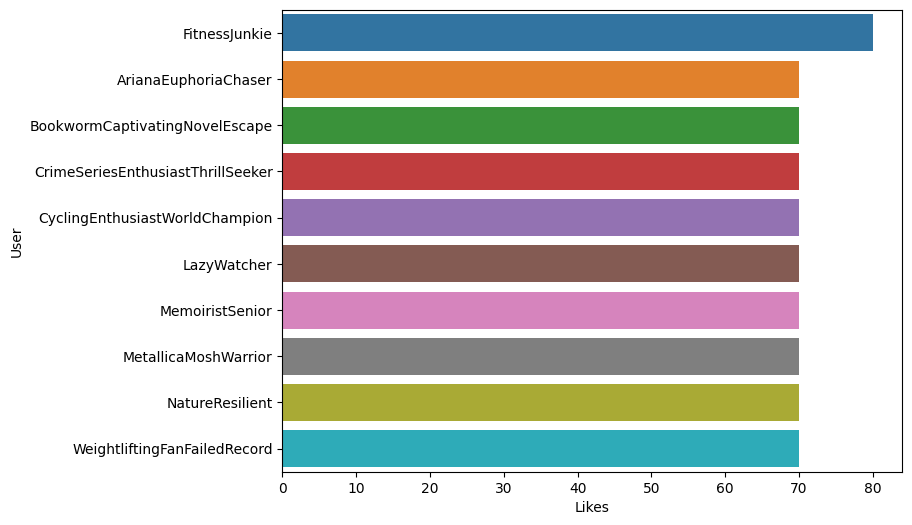

In [68]:
plt.figure(figsize = (8,6))
sns.barplot(x = "Likes", y = "User",data = hlf)
plt.show()

**likes years wise in Facebook**

In [69]:
k = df[df["Platform"] == "Facebook"]
b = k.groupby("Year")["Likes"].sum().reset_index()
lyf = pd.DataFrame(b)
lyf

,Year,Likes
0,2011,95
1,2012,60
2,2013,45
3,2015,425
4,2016,740
5,2017,479
6,2018,649
7,2019,592
8,2020,999
9,2021,937


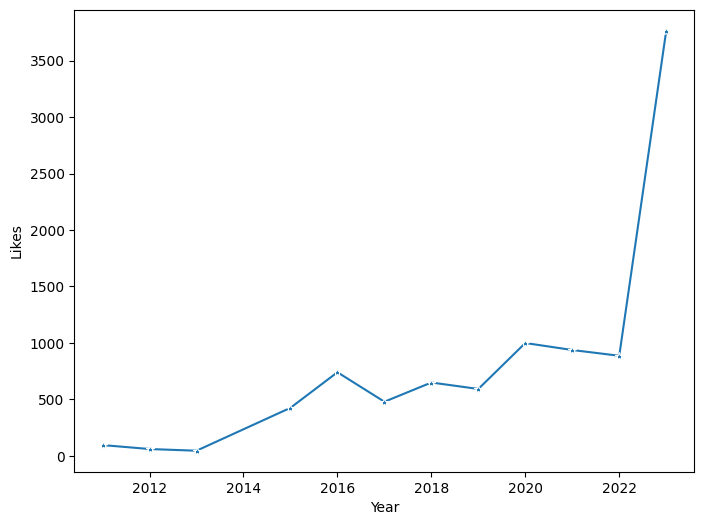

In [70]:
plt.figure(figsize = (8,6))
sns.lineplot(x = "Year", y = "Likes", data = lyf,marker='*')
plt.show()